# Estatística para Machine Learning

## 6. Probabilidade

In [4]:
import numpy as np
from scipy import stats
import seaborn as sns

### 6.1. Permutação

In [5]:
import math

In [3]:
math.factorial(3)

6

In [4]:
math.factorial(36) / math.factorial(36 - 5)

45239040.0

In [5]:
math.pow(36, 5)

60466176.0

### 6.2. Combinação

In [6]:
math.factorial(6) / (math.factorial(2) * math.factorial(6 - 2))

15.0

In [7]:
math.factorial(6 + 2 - 1) / (math.factorial(2) * math.factorial(6 - 1))

21.0

### 6.3. Interseção, união e diferença

In [8]:
a = (0,1,2,3,4,5,6,7)
b = (0,2,4,6,8)

#### 6.3.1. Interseção

In [9]:
set(a) and set(b)

{0, 2, 4, 6, 8}

#### 6.3.2. União

In [10]:
set(a) | set(b)

{0, 1, 2, 3, 4, 5, 6, 7, 8}

#### 6.3.3. Diferença

In [11]:
set(a).difference(set(b))

{1, 3, 5, 7}

In [12]:
set(b).difference(set(a))

{8}

### 6.4. Probabilidade e distribuição normal

In [13]:
dados = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                  140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                  147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                  150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                  154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                  157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                  161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                  164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                  168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                  171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                  178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

C:\Users\Libania\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


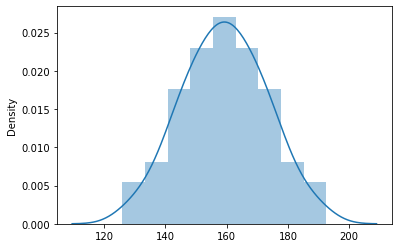

In [14]:
sns.distplot(dados);

In [15]:
media = np.mean(dados)
desvio_padrao = np.std(dados)
media, desvio_padrao

(159.25, 13.65)

In [16]:
np.quantile(dados, [0.25, 0.50, 0.75])

array([150.5 , 159.25, 168.  ])

### - Calcular a probabilidade de selecionar uma pessoa em Q1

In [17]:
(150.5 - media) / desvio_padrao

-0.641025641025641

In [18]:
0.26109

0.26109

In [19]:
stats.norm.cdf(150.5, media, desvio_padrao)

0.26075301195608336

### - Calcular a probabilidade de selecionar uma pessoa em Q3

In [20]:
(168 - media) / desvio_padrao

0.641025641025641

In [21]:
0.73891

0.73891

In [22]:
1 - 0.73891

0.26109000000000004

In [23]:
1 - stats.norm.cdf(168, media, desvio_padrao)

0.26075301195608336

In [24]:
stats.norm.sf(168, media, desvio_padrao)

0.26075301195608336

### - Calcular a probabilidade de selecionar uma pessoa entre Q2 e Q3

In [25]:
0.26109 + 0.26109

0.52218

### - Calcular a probabilidade de não selecionar uma pessoa em Q1 ou Q3

In [26]:
1 - 0.52218

0.47782

### Exercício 1
- Uma empresa fez um concurso para seleção de novos funcionários. A prova tinha 50 questões e o Pedro acertou 40 questões. Considerando uma distribuição normal com média 24 e desvio padrão de 8, quais são as chances dele ser contratado?

In [27]:
X = 40
media = 24
desvio_padrao = 8

In [28]:
padronizado = (X - media) / desvio_padrao
padronizado

2.0

In [29]:
0.97725

0.97725

In [30]:
stats.norm.cdf(1.68)

0.9535213421362799

In [31]:
stats.norm.ppf(0.9535213421362799)

1.68

In [32]:
stats.norm.cdf(X, media, desvio_padrao)

0.9772498680518208

### Exercício 2
- A vida útil de uma marca de pneus é representada por uma distribuição normal com média de 38.000 Km e desvio padrão de 3.000 Km
1. Qual a probabilidade de que um pneu escolhido aleatoriamente tenha vida útil de 35.000 Km?
2. Qual a probabilidade de que ele dure mais do que 44.000 Km?

#### Questão 1

In [33]:
1 - stats.norm.cdf(35000, 38000, 3000)

0.8413447460685429

In [34]:
stats.norm.sf(35000, 38000, 3000)

0.8413447460685429

#### Questão 2

In [35]:
1 - stats.norm.cdf(44000, 38000, 3000)

0.02275013194817921

In [36]:
stats.norm.sf(44000, 38000, 3000) * 100

2.2750131948179195

### 6.4. Probabilidade e distribuição binomial

#### Exemplo das moedas

- Jogando a moeda 10 vezes, qual a probabilidade de obter 5 "caras"?

In [1]:
n = 10
x = 5
p = 0.5

In [2]:
import math
(math.factorial(n))/(math.factorial(x) * math.factorial(n-x)) * math.pow(p, x) * math.pow(1 - p, n - x)

0.24609375

In [6]:
stats.binom.pmf(x, n, p)

0.24609375000000025

#### Exercício 1
- 70% das pessoas que compraram o livro de Python são mulheres. Se 10 leitores forem selecionados randomicamente, qual a probabilidade de selecionarmos 7 mulheres?

In [7]:
n = 10
x = 7
p = 0.7

In [8]:
stats.binom.pmf(x, n, p)

0.26682793200000016

#### Exercício 2
- Em uma linha de produção de uma fábrica de parafusos, a probabilidade de obter um parafuso defeituoso é 0,05. Tendo uma amostra de 50 peças, qual a probabilidade de obter
  1. Um parafuso defeituoso
  2. Nenhum parafuso defeituoso

In [10]:
# Questão 1
n = 50
x = 1
p = 0.05

In [11]:
stats.binom.pmf(x, n, p)

0.20248677704398393

In [12]:
# Questão 2
n = 50
x = 0
p = 0.05

In [13]:
stats.binom.pmf(x, n, p)

0.0769449752767133

### 6.5. Probabilidade e distribuição de Poisson

#### Exemplo dos carros
- O número médio de carros vendidos por dia é 10. Qual a probabilidade de vender 14 carros amanhã?

In [14]:
x = 14
media = 10

In [15]:
math.e

2.718281828459045

In [16]:
math.pow(math.e, -media) * (math.pow(media, x) / math.factorial(x)) * 100

5.207710444602621

In [17]:
stats.poisson.pmf(x, media)

0.05207710444602615

#### Exercício 1
- Em uma linha de produção de uma fábrica de parafusos, a probabilidade é de obter 0,05 defeitos por UNIDADE. Qual a probabilidade de uma unidade apresentar:
  1. Um defeito
  2. Nenhum defeito

In [18]:
# Questão 1
x = 1
media = 0.05 

In [19]:
stats.poisson.pmf(x, media) * 100

4.756147122503571

In [20]:
# Questão 2
x = 0
media = 0.05

In [21]:
stats.poisson.pmf(x, media) * 100

95.1229424500714

#### Exercício 2
- Um vendedor de uma loja vende em média 50 produtos por dia. Qual a probabilidade de vender somente 5 produtos no próximo dia?

In [22]:
x = 5
media = 50

In [23]:
stats.poisson.pmf(x, media)

5.02278606240605e-16

### 6.6. Previsão de probabilidades em machine learning

In [24]:
import pandas as pd
dataset = pd.read_csv('credit_data.csv')
dataset.dropna(inplace=True)
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [25]:
X = dataset.iloc[:,1:4].values
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [26]:
y = dataset.iloc[:,4].values
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [27]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X, y)

GaussianNB()

In [28]:
X[0], X[0].shape

(array([6.61559251e+04, 5.90170151e+01, 8.10653213e+03]), (3,))

In [29]:
novo = X[0].reshape(1,-1)
novo.shape

(1, 3)

In [30]:
novo

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03]])

In [31]:
naive_bayes.predict(novo)

array([0], dtype=int64)

In [32]:
previsao = naive_bayes.predict_proba(novo)
previsao

array([[1.00000000e+00, 2.03924534e-10]])

In [33]:
np.argmax(previsao)

0